### **NOTE:**

**This notebook offers a sample analysis of a salary dataset. I've provided descriptions for some analyses to guide you, while others are left open for exploration. You can conduct various types of analyses based on your dataset, tailoring them to your specific needs.**

# **Loading  Libraries**

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Loading the dataset**

In [ ]:
from google.colab import files
files.upload()

In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d mohithsairamreddy/salary-data

Dataset URL: https://www.kaggle.com/datasets/mohithsairamreddy/salary-data
License(s): Community Data License Agreement - Sharing - Version 1.0
  0% 0.00/16.6k [00:00<?, ?B/s]
100% 16.6k/16.6k [00:00<00:00, 27.4MB/s]


In [4]:
!unzip /content/salary-data.zip
!ls

Archive:  /content/salary-data.zip
  inflating: Salary_Data.csv         
kaggle.json  Salary_Data.csv  salary-data.zip  sample_data


In [10]:
salary_df= pd.read_csv('/content/Salary_Data.csv')

salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# **1. Initial Exploration**

## **Checking Shape of the dataset**

Explanation: The `shape` attribute of the DataFrame is used to view its dimensions, returning the number of rows and columns. In this case, the `salary_df` DataFrame has 6704 rows and 6 columns.

In [17]:
# Viewing the shape of the DataFrame
print("Shape of the DataFrame:")
print(salary_df.shape)

Shape of the DataFrame:
(6704, 6)


## **Checking Data Types**

**Explanation:** The provided code counts and prints the number of numerical and categorical columns in a DataFrame. It finds 3 numerical columns and 3 categorical columns in the `salary_df` DataFrame.

In [11]:
# Counting numerical columns
numerical_columns = salary_df.select_dtypes(include=['int64', 'float64']).columns
num_numerical_columns = len(numerical_columns)

# Counting categorical columns
categorical_columns = salary_df.select_dtypes(include=['object', 'category']).columns
num_categorical_columns = len(categorical_columns)

# Printing the counts
print("Number of numerical columns:", num_numerical_columns)
print("Number of categorical columns:", num_categorical_columns)


Number of numerical columns: 3
Number of categorical columns: 3


**Explanation:**  The `info()` method provides a concise summary of the `salary_df` DataFrame, indicating it has 6704 entries and 6 columns, with 3 columns of type `float64` and 3 of type `object`.

In [12]:
# Using info() to get a concise summary of the DataFrame
print("DataFrame information:")
salary_df.info()

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


## **Summary Statistics**

**Explanation:** The `describe()` method provides summary statistics for the numeric columns in the `salary_df` DataFrame. For `Age`, `Years of Experience`, and `Salary`, it includes the count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values. This gives a detailed overview of the distribution and central tendencies of the numeric data.

In [13]:
# Checking summary statistics of numeric columns in the DataFrame
numeric_summary_statistics = salary_df.describe()
print("Summary statistics of numeric columns:")
numeric_summary_statistics

Summary statistics of numeric columns:


,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


**Explanation:** The `describe(include='object')` method provides summary statistics for the categorical columns in the `salary_df` DataFrame. It includes the count, number of unique values, most frequent value (top), and the frequency of the most frequent value (freq) for `Gender`, `Education Level`, and `Job Title`. This shows that:

- `Gender` has 3 unique values, with "Male" being the most frequent (3674 times).
- `Education Level` has 7 unique values, with "Bachelor's Degree" being the most frequent (2267 times).
- `Job Title` has 193 unique values, with "Software Engineer" being the most frequent (518 times).

In [14]:
# Checking summary statistics of categorical columns in the DataFrame
categorical_summary = salary_df.describe(include='object')
print("Summary statistics of categorical columns:")
categorical_summary

Summary statistics of categorical columns:


,Gender,Education Level,Job Title
count,6702,6701,6702
unique,3,7,193
top,Male,Bachelor's Degree,Software Engineer
freq,3674,2267,518


## **Checking Duplicate Values**

**Explanation:** The `duplicated()` method of pandas, combined with the `sum()` method, is used to count the number of duplicate rows in a DataFrame. .... (Your Analysis)

In [ ]:
# Checking for duplicate values
duplicate_rows = salary_df.duplicated().sum()

# Printing the count of duplicate rows
print("Number of duplicate rows:", duplicate_rows)


## **Checking Null Values**

**Explanation:** The code calculates the count of null values in each column of the `salary_df` DataFrame using the `isnull()` method, which returns a DataFrame of boolean values indicating where the null values are located, and then the `sum()` method is applied to count them. It prints the count of null values for each column, showing that 'Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', and 'Salary' columns have 2, 2, 3, 2, 3, and 5 null values respectively.

In [18]:
# Count of null values in each column
null_counts = salary_df.isnull().sum()
print("Count of null values in each column:")
print(null_counts)

Count of null values in each column:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


## **Heatmap of NULL Values**

**NOTE:**

Since there are only a few null values in each column, they might not be easily noticeable in a heatmap representation. This is because their proportion is small compared to the overall dataset size, making them less prominent in the visualization.

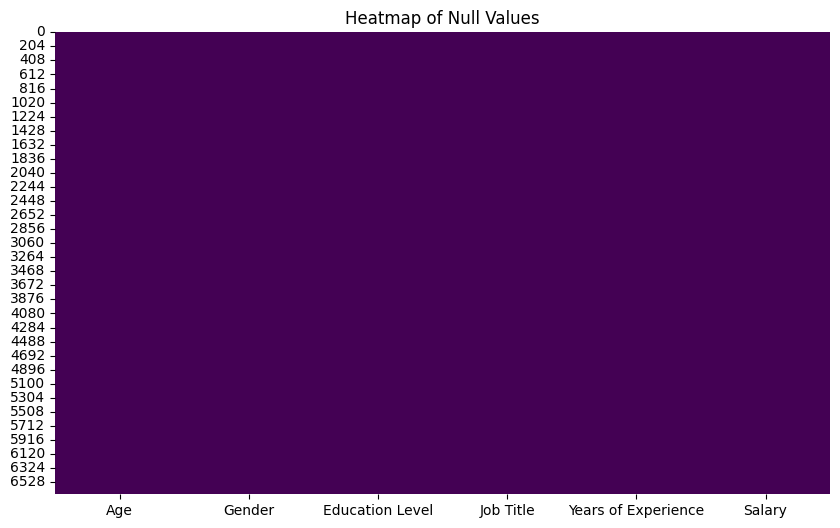

In [20]:
# Create a heatmap for null values
plt.figure(figsize=(10, 6))
sns.heatmap(salary_df.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap of Null Values')
plt.show()


**Other method for visualizing Null values**

<Axes: >

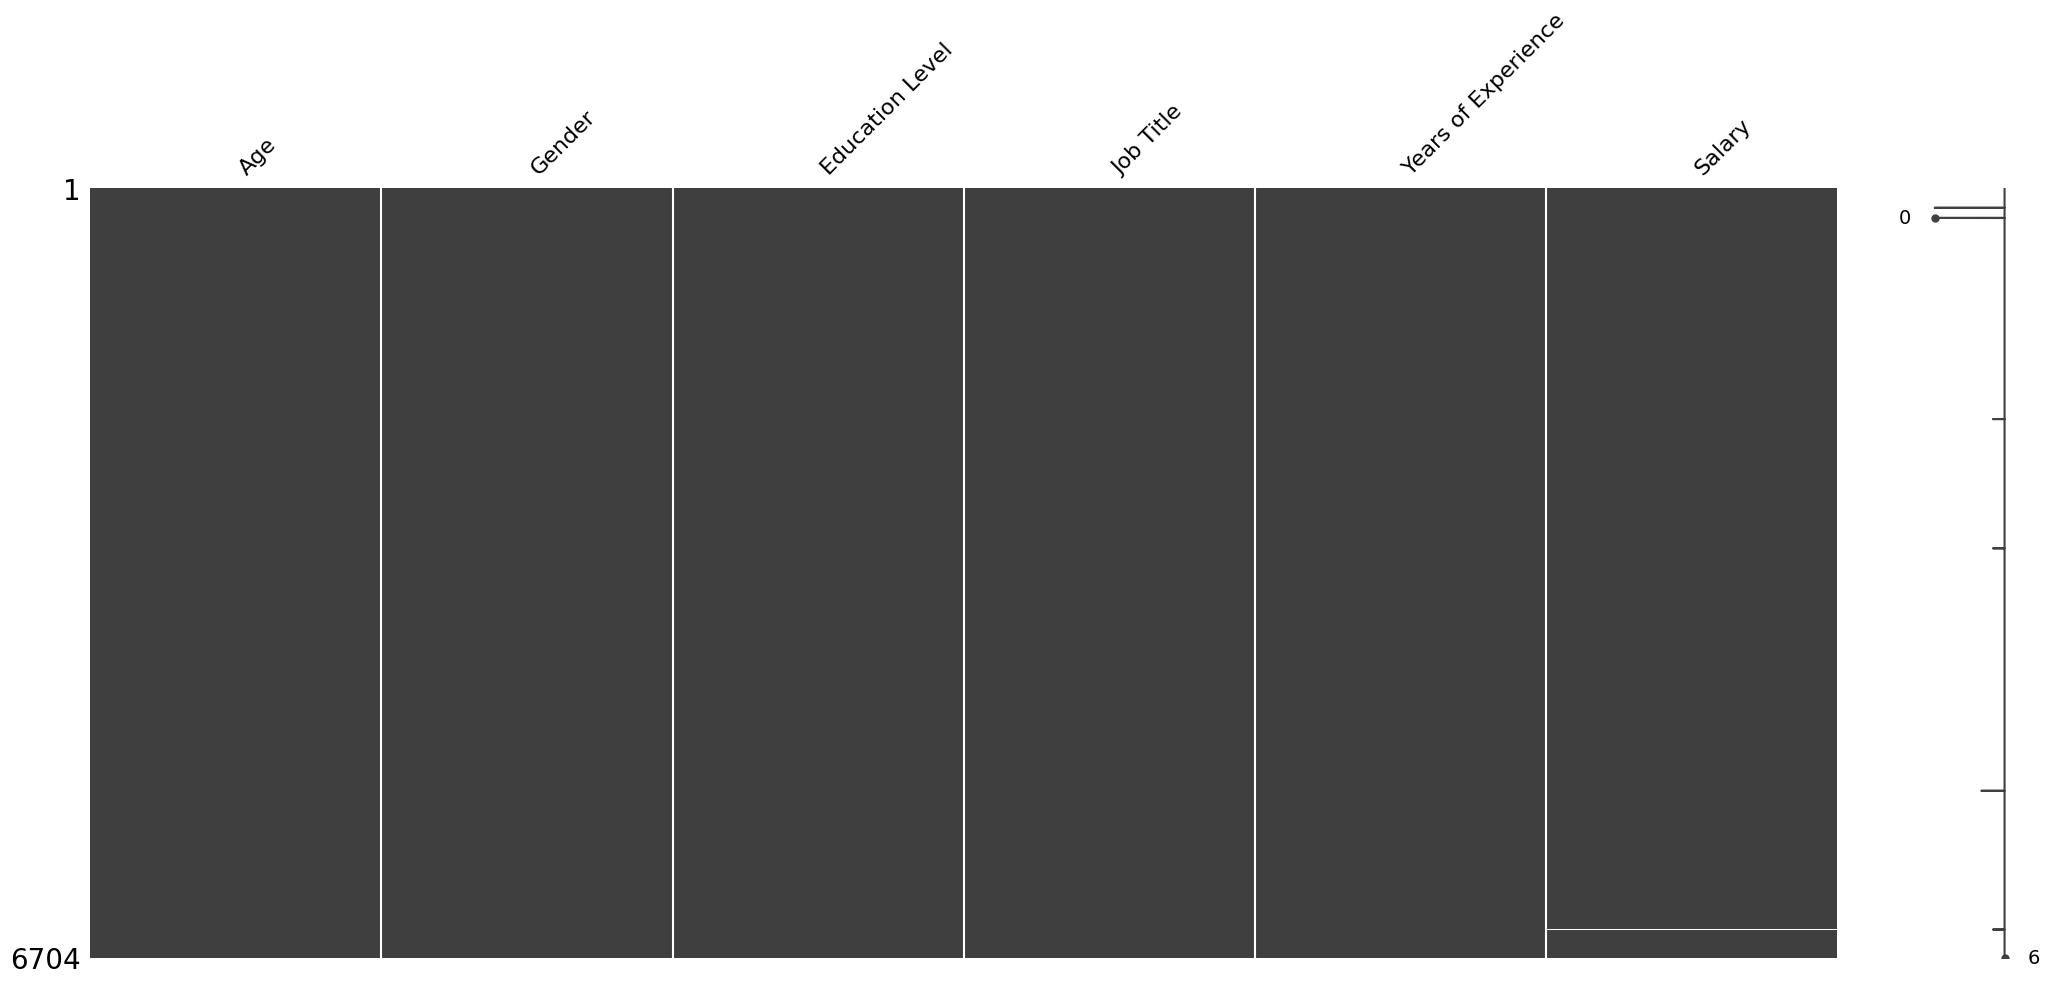

In [21]:
import missingno as msno

# Visualizing missing values
msno.matrix(salary_df)


#**2. Exploratory Data Analysis (EDA)**


## **You can create various visualizations based on your dataset. Here are some sample visualizations for this dataset.**

## **Histograms for all numerical columns**

**Explanation:** This code first selects all numerical columns from the DataFrame and then plots histograms for each numerical column. The histograms visualize the distribution of numerical data, providing insights into the ranges and frequencies of values in each column.

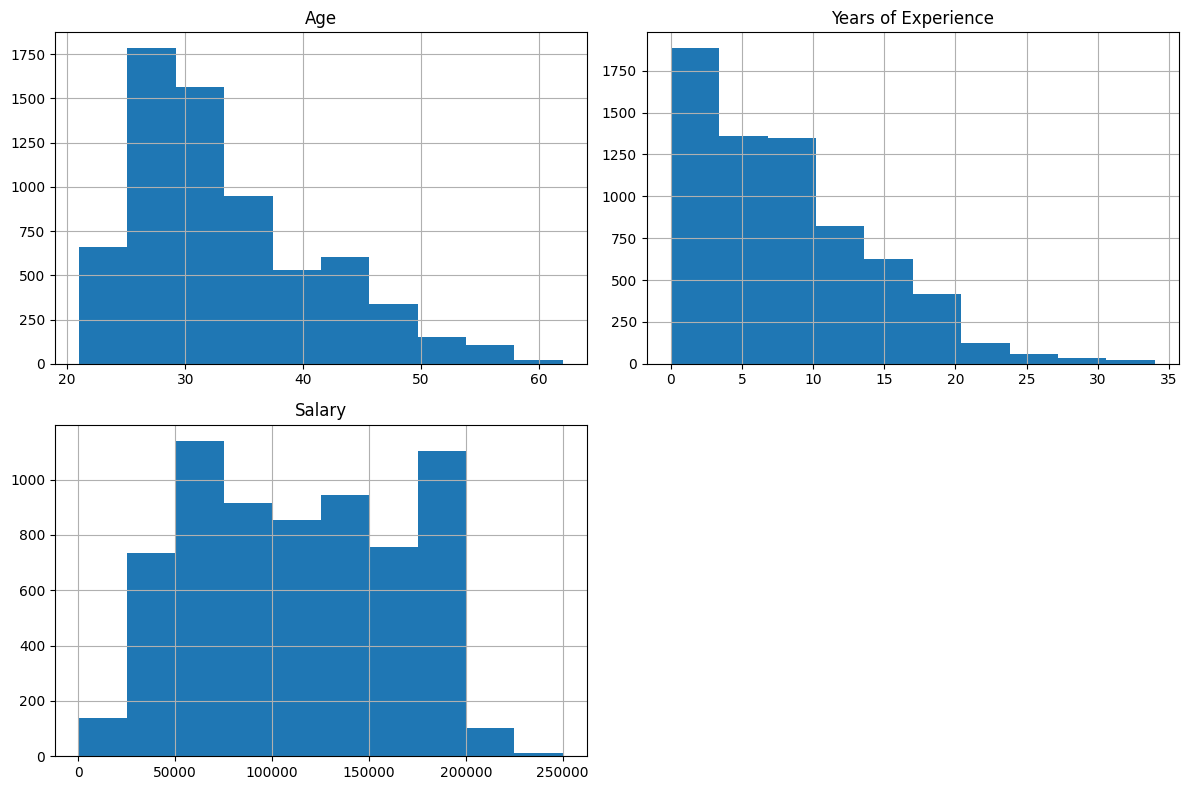

In [22]:
# Selecting numerical columns
numerical_columns = salary_df.select_dtypes(include=['int64', 'float64'])

# Plotting histograms for each numerical column
numerical_columns.hist(figsize=(12, 8))
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## **Box plots of numerical columns**


**Explanation:** .......

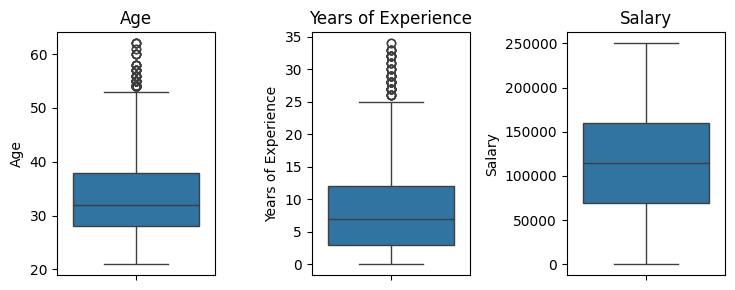

In [23]:
# Draw box plots of numerical columns using subplots
numeric_cols = salary_df.select_dtypes(include=['int64', 'float64']).columns


# Adjusting the subplot grid size to accommodate all numeric columns
num_cols = len(numeric_cols)
num_rows = (num_cols // 4) + (1 if num_cols % 4 else 0)  # Adjust the number of rows in the grid

plt.figure(figsize=(10, num_rows * 3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(data=salary_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## **Bar charts for all categorical columns**

**Explanation:** .......

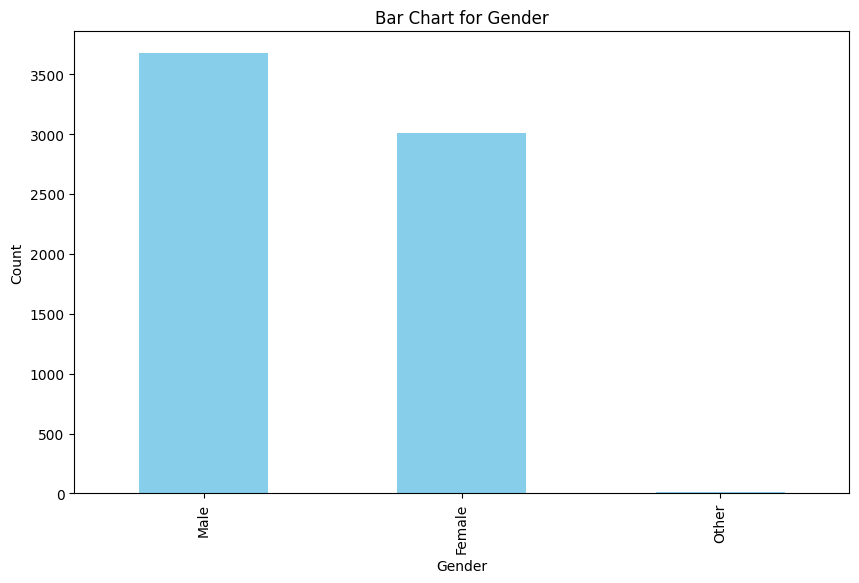

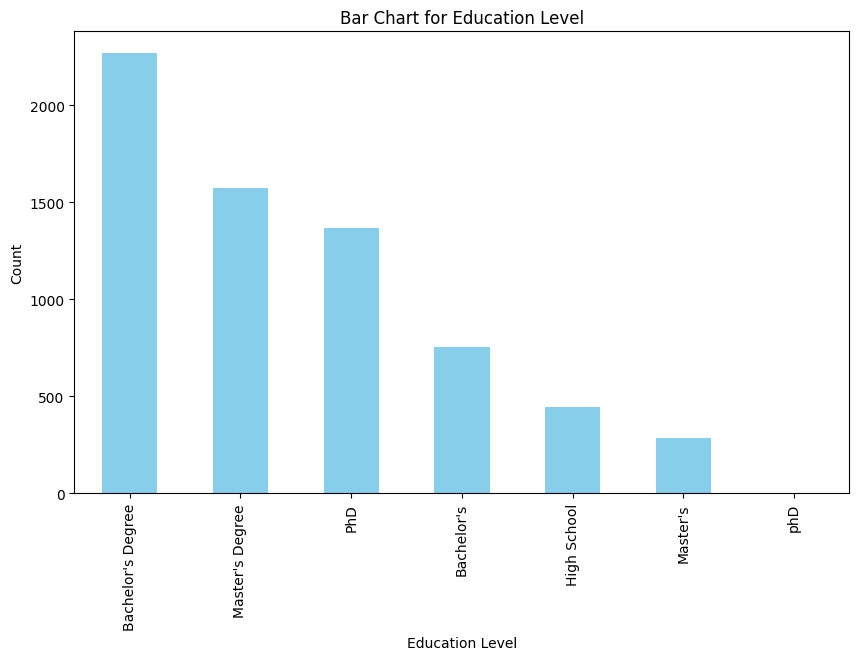

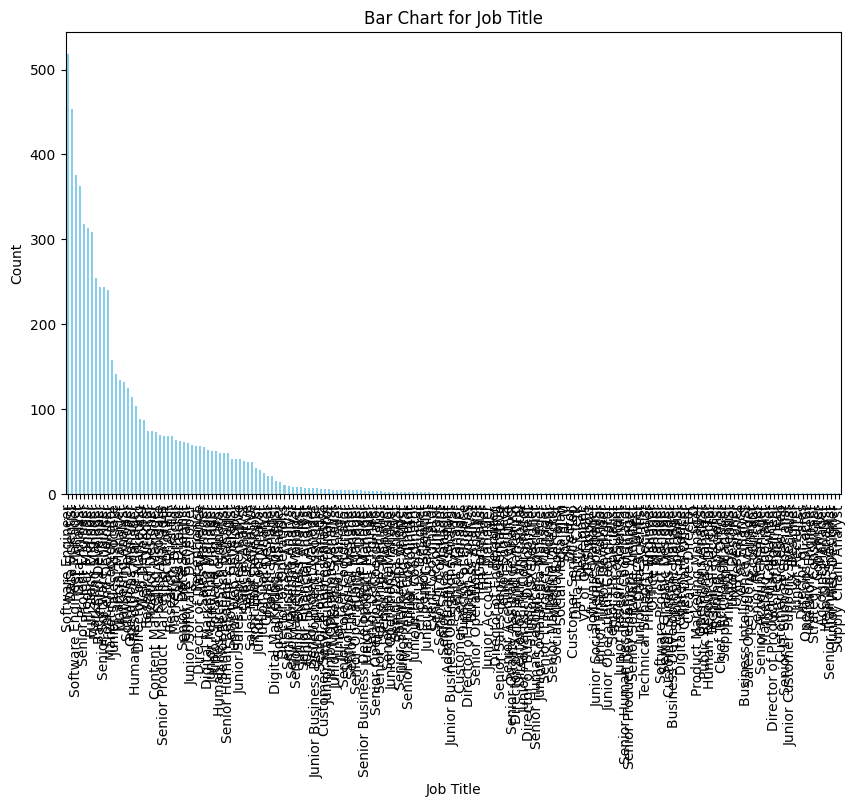

In [25]:
# Selecting categorical columns
categorical_columns = salary_df.select_dtypes(include=['object'])

# Plotting bar charts for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    salary_df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-labels for better readability
    plt.show()


## **Scatter Plot for Salary vs. Years of Experience:**

**Explanation:** The scatter plot illustrates the relationship between Salary and Years of Experience, indicating that higher salaries are typically associated with more years of experience, portraying a positive trend. The correlation coefficient (0.81) reinforces this finding, denoting a strong positive linear relationship between Salary and Years of Experience, affirming that as Years of Experience rises, Salary tends to increase proportionally.

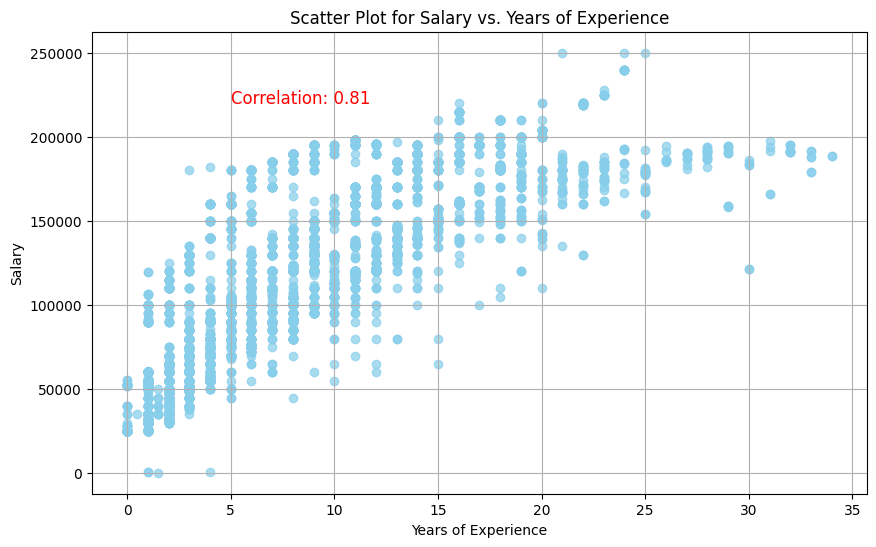

Correlation Coefficient (Salary vs. Years of Experience): 0.8089689398558264


In [28]:
# Calculate correlation coefficient
correlation_coefficient = salary_df['Years of Experience'].corr(salary_df['Salary'])

# Scatter plot for Salary vs. Years of Experience with correlation
plt.figure(figsize=(10, 6))
plt.scatter(salary_df['Years of Experience'], salary_df['Salary'], color='skyblue', alpha=0.7)
plt.title('Scatter Plot for Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)

# Adding correlation coefficient as text to the plot
correlation_text = f'Correlation: {correlation_coefficient:.2f}'
plt.text(5, 220000, correlation_text, fontsize=12, color='red')

plt.show()

# Print correlation coefficient
print("Correlation Coefficient (Salary vs. Years of Experience):", correlation_coefficient)


## **Violin Plot for Age Distribution by Gender**

**Explanation:** This code will generate a violin plot that visually represents the distribution of ages for others, male and female and employees.

<ipython-input-32-7625215113d4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Age', data=salary_df, palette='muted')


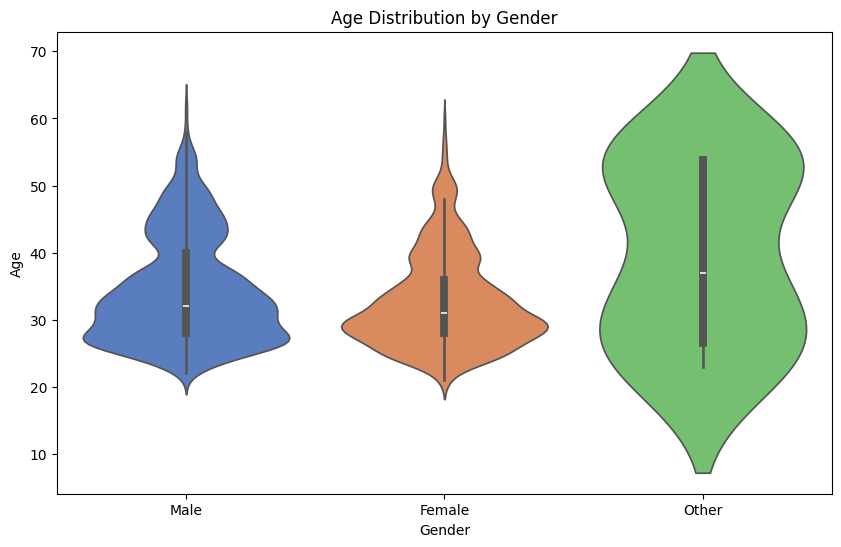

In [32]:
# Violin plot for Age Distribution by Gender
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Age', data=salary_df, palette='muted')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


## **Pie Chart of Gender**


**Explanation:** This code will generate a pie chart that visually represents the distribution of male and female employees in the dataset.

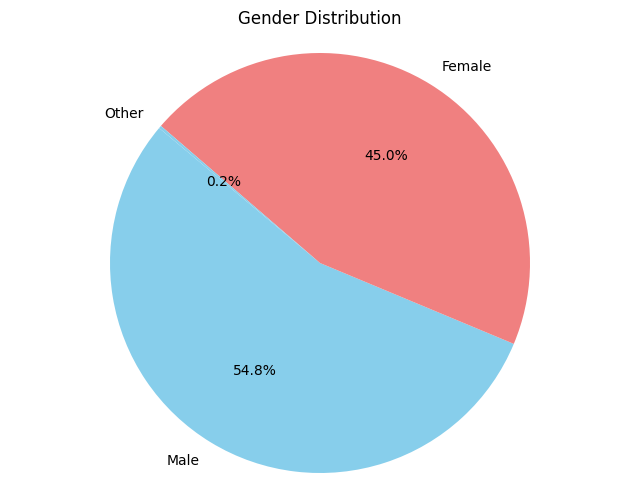

In [33]:
# Calculate the count of male and female employees
gender_counts = salary_df['Gender'].value_counts()

# Calculate the percentage of each gender category
gender_percentage = gender_counts / gender_counts.sum() * 100

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_percentage, labels=gender_percentage.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


## **Stacked Bar Chart of Education Level Distribution by Gender**


**Explanation:**

1. **Grouping and Counting:**
   - The code groups the DataFrame by 'Gender' and 'Education Level' using `groupby`, then counts the occurrences of each combination. The `unstack` method is used to convert the counts into a DataFrame format where the index is 'Gender' and the columns are 'Education Level'.

2. **Creating the Stacked Bar Chart:**
   - The `plot` method with `kind='bar'` and `stacked=True` creates a stacked bar chart. Each bar represents a gender, and within each bar, segments represent the counts of different education levels. The `colormap='viridis'` adds a color scheme for better visualization.


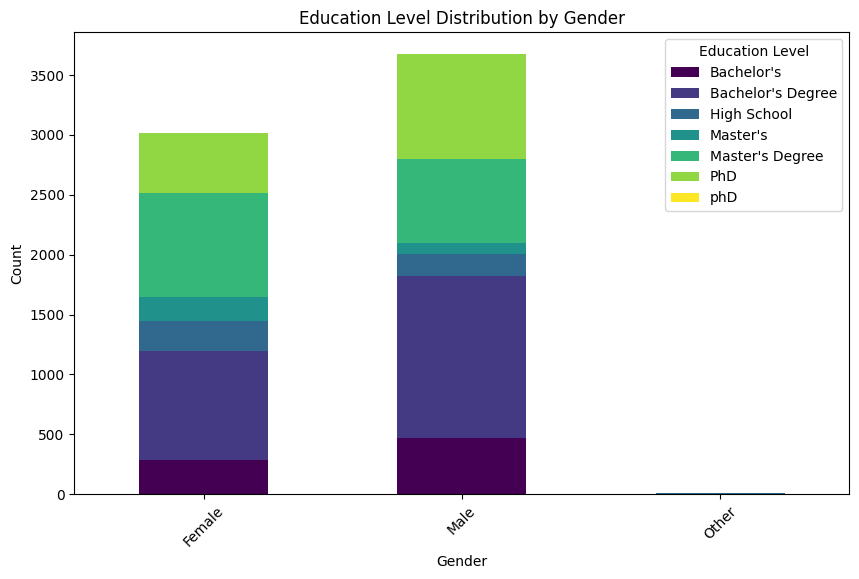

In [38]:
# Count of education levels by Gender
education_job_counts = salary_df.groupby(['Gender', 'Education Level']).size().unstack()

# Plotting the stacked bar chart
education_job_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Education Level Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Education Level')
plt.xticks(rotation=45)
plt.show()


# **3. Correlation Matrix**

**Explanation:** ...........

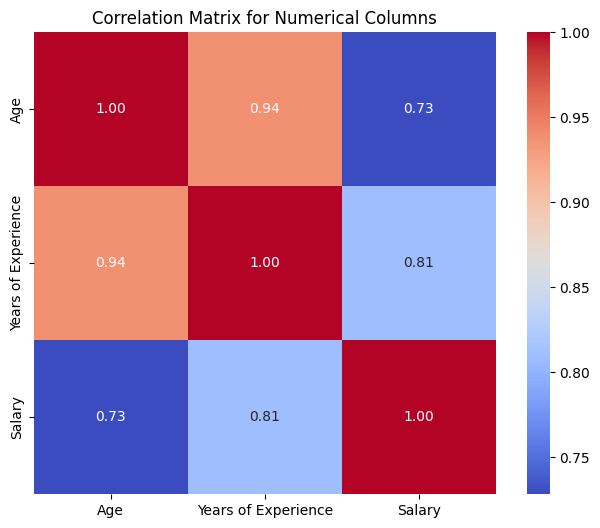

In [41]:
# Selecting only numerical columns
numeric_cols = salary_df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix for numerical columns only
correlation_matrix = salary_df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()


# **4.Data Preprocessing**

## **Drop Duplicate Values**

**Explanation:** ...........

In [ ]:
# Drop duplicate rows
salary_df = salary_df.drop_duplicates()

# Print the DataFrame after dropping duplicates
print("DataFrame after dropping duplicates:")
print(salary_df)

## **Handling Missing / Null Values**

**First method: Drop null values**   

The code drops any rows containing null values from the DataFrame `salary_df` and prints the DataFrame without those null-containing rows **(not recommending)**.

In [ ]:
# Dropping rows with null values
salary_df = salary_df.dropna()

# Print the DataFrame after dropping null values
print(salary_df)

**Second method: Impute missing values with mean and mode**

**Explanation:**

1. **Separate numerical and categorical columns:**
   - `select_dtypes(include=['int64', 'float64']).columns` selects numerical columns.
   - `select_dtypes(include=['object']).columns` selects categorical columns.

2. **Impute missing values with mean for numerical columns:**
   - `salary_df[numerical_columns].mean()` calculates the mean for each numerical column.
   - `fillna()` fills missing values in numerical columns with the mean.

3. **Impute missing values with mode for categorical columns:**
   - `salary_df[categorical_columns].mode().iloc[0]` calculates the mode (most frequent value) for each categorical column.
   - `fillna()` fills missing values in categorical columns with the mode.

This process ensures that missing values are imputed appropriately based on the type of data in each column.


In [43]:
# Separate numerical and categorical columns
numerical_columns = salary_df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = salary_df.select_dtypes(include=['object']).columns

# Impute missing values with mean for numerical columns
salary_df[numerical_columns] = salary_df[numerical_columns].fillna(salary_df[numerical_columns].mean())

# Impute missing values with mode for categorical columns
salary_df[categorical_columns] = salary_df[categorical_columns].fillna(salary_df[categorical_columns].mode().iloc[0])


To check if there are any null values in the salary  DataFrame or not:

In [44]:
# Count of null values in each column
null_counts = salary_df.isnull().sum()
print("Count of null values in each column:")
print(null_counts)

Count of null values in each column:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


The output represents the count of null values in each column of the DataFrame. Each row in the output corresponds to a column in the DataFrame, with the column name on the left and the count of null values in that column on the right.

In this case, all columns have a count of zero null values, indicating that there are no null values present in any of the columns.